# Cross validation application in logistic regression algorithm

In [1]:
import numpy as np
import pandas as pd

### Dataset

Dataset used is Speed Dating dataset from kaggle: https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating

The objective is to predict wether two people matched or not after their first date.

In [2]:
df=pd.read_csv("speeddating.csv",header=0)

In [3]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    has_null                         8378 non-null   object 
 1    wave                             8378 non-null   float64
 2    gender                           8378 non-null   object 
 3    age                              8283 non-null   float64
 4    age_o                            8274 non-null   float64
 5    d_age                            8378 non-null   float64
 6    d_d_age                          8378 non-null   object 
 7    race                             8378 non-null   object 
 8    race_o                           8378 non-null   object 
 9    samerace                         8378 non-null   object 
 10   importance_same_race             8299 non-null   float64
 11   importance_same_religion         8299 non-null   float64
 12   d_im

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_15352\2728897127.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_15352\773260776.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

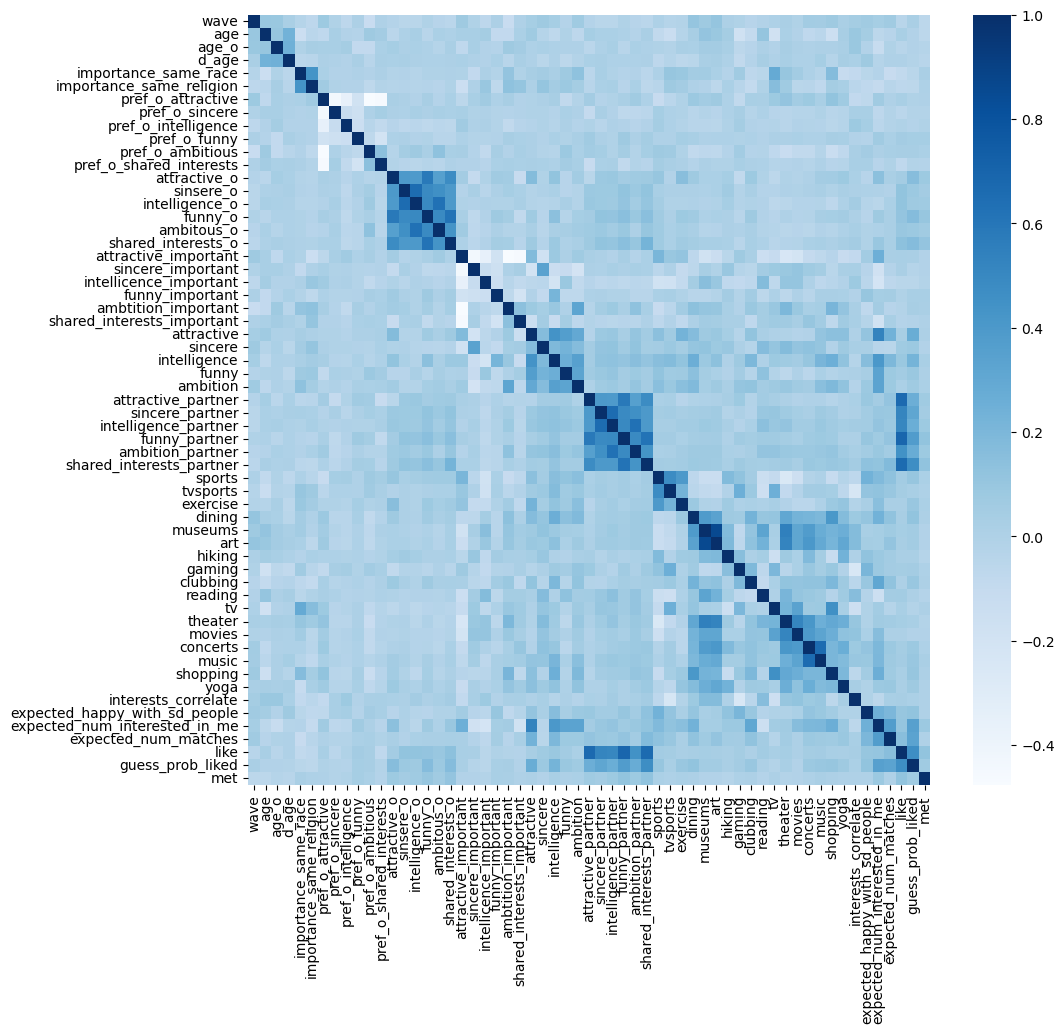

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
plt.figure(figsize=(11,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="Blues")

Description of the columns is found in the file [speeddatingcolumns.txt](speeddatingcolumns.txt)

From the descriptions is apparent that the columns with type float is a ranking maybe 1-10 or 1-100 (must review the max values to be sure on that one). On the other part, most of the object type columns are groupings of the numerical values. Other columns such as gender and the match are objects.

Some columns may be biased such as columns met,decision and like.

In [5]:
nans = ((df.isna().sum() / len(df)) * 100 ).sort_values(ascending=False)
nans.head(15)

expected_num_interested_in_me    78.515159
expected_num_matches             14.000955
shared_interests_o               12.843161
shared_interests_partner         12.735736
ambitous_o                        8.617809
ambition_partner                  8.498448
met                               4.476009
funny_o                           4.296968
funny_partner                     4.177608
guess_prob_liked                  3.688231
intelligence_o                    3.652423
intelligence_partner              3.533063
sinsere_o                         3.425639
sincere_partner                   3.306278
like                              2.864646
dtype: float64

Will drop colums missing more than 5% of values (expected_num_interested_in_me,expected_num_matches,shared_interests_o,
shared_interests_partner,ambitous_o,ambition_partner)

In [8]:
df=df.drop(["expected_num_interested_in_me","expected_num_matches","shared_interests_o","shared_interests_partner","ambitous_o","ambition_partner"],axis=1)

In [9]:
nans = ((df.isna().sum() / len(df)) * 100 ).sort_values(ascending=False)
nans.head(15)

met                           4.476009
funny_o                       4.296968
funny_partner                 4.177608
guess_prob_liked              3.688231
intelligence_o                3.652423
intelligence_partner          3.533063
sinsere_o                     3.425639
sincere_partner               3.306278
like                          2.864646
attractive_o                  2.530437
attractive_partner            2.411077
interests_correlate           1.885892
pref_o_shared_interests       1.539747
shared_interests_important    1.444259
pref_o_ambitious              1.277154
dtype: float64

In [16]:
dropped=df.copy().dropna(how="any")
print(f"dropped={(dropped.shape[0]/df.shape[0])*100}% of df")
print(dropped.shape)

dropped=84.49510623060397% of df
(7079, 117)


Still there's lots of data and no missing values

In [17]:
df=df.dropna(how="any")
df.shape

(7079, 117)

In [20]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 8377
Data columns (total 117 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    has_null                         7079 non-null   object 
 1    wave                             7079 non-null   float64
 2    gender                           7079 non-null   object 
 3    age                              7079 non-null   float64
 4    age_o                            7079 non-null   float64
 5    d_age                            7079 non-null   float64
 6    d_d_age                          7079 non-null   object 
 7    race                             7079 non-null   object 
 8    race_o                           7079 non-null   object 
 9    samerace                         7079 non-null   object 
 10   importance_same_race             7079 non-null   float64
 11   importance_same_religion         7079 non-null   float64
 12   d_im

Can still drop a couple of columns that can bias the answers like columns has_null,wave,like,decision,decision_o,d_like,and other that have repeated information like the ones that are groupings of the asnwers for example d_age and d_d_age tell the same info as age and age_o combined

In [21]:
to_drop=["has_null","wave","d_age","d_d_age","samerace","d_importance_same_race","d_importance_same_religion","d_pref_o_attractive","d_pref_o_sincere",\
        "d_pref_o_intelligence","d_pref_o_funny","d_pref_o_ambitious","d_pref_o_shared_interests","d_attractive_o","d_sinsere_o","d_intelligence_o",\
        "d_funny_o","d_ambitous_o","d_shared_interests_o","d_attractive_important","d_sincere_important","d_intellicence_important","d_funny_important",\
        "d_ambtition_important","d_shared_interests_important","d_attractive","d_sincere","d_intelligence","d_funny","d_ambition","d_attractive_partner",\
        "d_sincere_partner","d_intelligence_partner","d_funny_partner","d_ambition_partner","d_shared_interests_partner","d_sports","d_tvsports","d_exercise",\
        "d_dining","d_museums","d_art","d_hiking","d_gaming","d_clubbing","d_reading","d_tv","d_theater","d_movies","d_concerts","d_music","d_shopping","d_yoga",\
        "d_interests_correlate","expected_happy_with_sd_people","d_expected_num_interested_in_me","d_expected_num_matches","like","guess_prob_liked","d_like",\
        "d_guess_prob_liked","met","decision","decision_o"]

df=df.drop(to_drop,axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 8377
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           7079 non-null   object 
 1   age                              7079 non-null   float64
 2   age_o                            7079 non-null   float64
 3   race                             7079 non-null   object 
 4   race_o                           7079 non-null   object 
 5   importance_same_race             7079 non-null   float64
 6   importance_same_religion         7079 non-null   float64
 7   field                            7079 non-null   object 
 8   pref_o_attractive                7079 non-null   float64
 9   pref_o_sincere                   7079 non-null   float64
 10  pref_o_intelligence              7079 non-null   float64
 11  pref_o_funny                     7079 non-null   float64
 12  pref_o_ambitious    

Pretty much clean, now its just matter of converting categorical columns

In [23]:
y = df.pop('match')  # labels correspond to column match
X = pd.get_dummies(df)  #data is rest of columns and there is still categorical colums

Now onto the ML algorithms

In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

stdscaler=StandardScaler()
mmscaler=MinMaxScaler()
stdscaler.fit(X)
mmscaler.fit(X)

Xx=stdscaler.transform(X)
Xxx=mmscaler.transform(X)

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xxx,y, test_size = 0.2, random_state = 0, shuffle = True)
print(type(x_train),type(x_test),type(y_train),type(y_test))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
(5663, 318) (1416, 318) (5663,) (1416,)


Just logistic regression:

In [55]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression(random_state=0,max_iter=500)
logr.fit(x_train,y_train)
logr.score(x_test,y_test)

0.8453389830508474

Now with Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score

logr_cv=LogisticRegression(random_state=0,max_iter=500)
cross=cross_val_score(logr_cv,Xxx,y,cv=7)
cross,np.mean(cross)

(array([0.82905138, 0.82312253, 0.83382789, 0.82294758, 0.82789318,
        0.82591494, 0.83877349]),
 0.8287901407498879)

## Decision Trees and Random Forest

Now introducing the topic of Decision Trees, we apply decision trees and random forest as classifiers and do the same exercise with cross validation like before, as well as a grid search on the hyperparameters

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0,min_samples_leaf=5)
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7824858757062146

In [58]:
forest=RandomForestClassifier(random_state=0,min_samples_leaf=5,n_estimators=100)
forest.fit(x_train,y_train)
forest.score(x_test,y_test)

0.8326271186440678

Now with cv

In [61]:
tree_cv=DecisionTreeClassifier(random_state=0,min_samples_leaf=5)
cross_tree=cross_val_score(tree_cv,Xx,y,cv=10)
cross_tree,np.mean(cross_tree)

(array([0.76836158, 0.78107345, 0.76694915, 0.76694915, 0.79943503,
        0.73163842, 0.7740113 , 0.75988701, 0.78248588, 0.80339463]),
 0.773418558562878)

In [62]:
forest_cv=RandomForestClassifier(random_state=0,min_samples_leaf=5,n_estimators=100)
cross_forest=cross_val_score(forest_cv,Xx,y,cv=10)
cross_forest,np.mean(cross_forest)

(array([0.82909605, 0.82344633, 0.82768362, 0.82344633, 0.82909605,
        0.82485876, 0.82485876, 0.82344633, 0.8319209 , 0.82743989]),
 0.8265292994190461)

Now with grid search (Sklearn's GridSearchCV does both the search and cv)

In [64]:
from sklearn.model_selection import GridSearchCV

tree_grid={
    "max_features":["sqrt","log2"],
    "criterion":['gini', 'entropy'],
    "max_depth":[2,5,10,20],
    "min_samples_leaf":[1,2,5,10]
}

tree_gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=tree_grid,cv=5)
tree_gs.fit(Xx,y)
tree_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5}

In [66]:
tree_best=DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=5,max_features="sqrt",min_samples_leaf=5)
tree_best.fit(x_train,y_train)
tree_best.score(x_test,y_test)

0.8340395480225988

With the grid search results acc of tree is 83.4% and at first it was 77.3% (the later with the grid search)

In [69]:
forest_grid={
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,5,10],
    "min_samples_leaf": [1,2,5,10],
    'criterion' :['gini', 'entropy'],
    'random_state' : [0]
}

forest_gs=GridSearchCV(estimator=RandomForestClassifier(),param_grid=forest_grid,cv=5)
forest_gs.fit(Xx,y)
forest_gs.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200,
 'random_state': 0}

In [ ]:
forest_grid2={
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,5,10],
    "min_samples_leaf": [2,5,10],
    'criterion' :['gini', 'entropy'],
}
forest_gs2=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=forest_grid2,cv=5)
forest_gs2.fit(Xx,y)


In [74]:
forest_gs2.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 200}

The best parameter for min_samples_leaf seems to always be the least of the possible from the grid. That indicates that putting a parameter like 1 or 2 would overfit the model to the data.